In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

description of dataset [here](https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset)

In [3]:
dataset = load_diabetes()

In [4]:
columns = [
    'age',
    'sex',
    'body_mass_index',
    'average_blood_pressure',
    's1',
    's2',
    's3',
    's4',
    's5',
    's6'
]

In [5]:
X = dataset['data']
y = dataset['target']

In [6]:
X.shape

(442, 10)

In [7]:
y.shape

(442,)

In [8]:
df_x = pd.DataFrame(X, columns=columns)
df_x.describe()

,age,sex,body_mass_index,average_blood_pressure,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


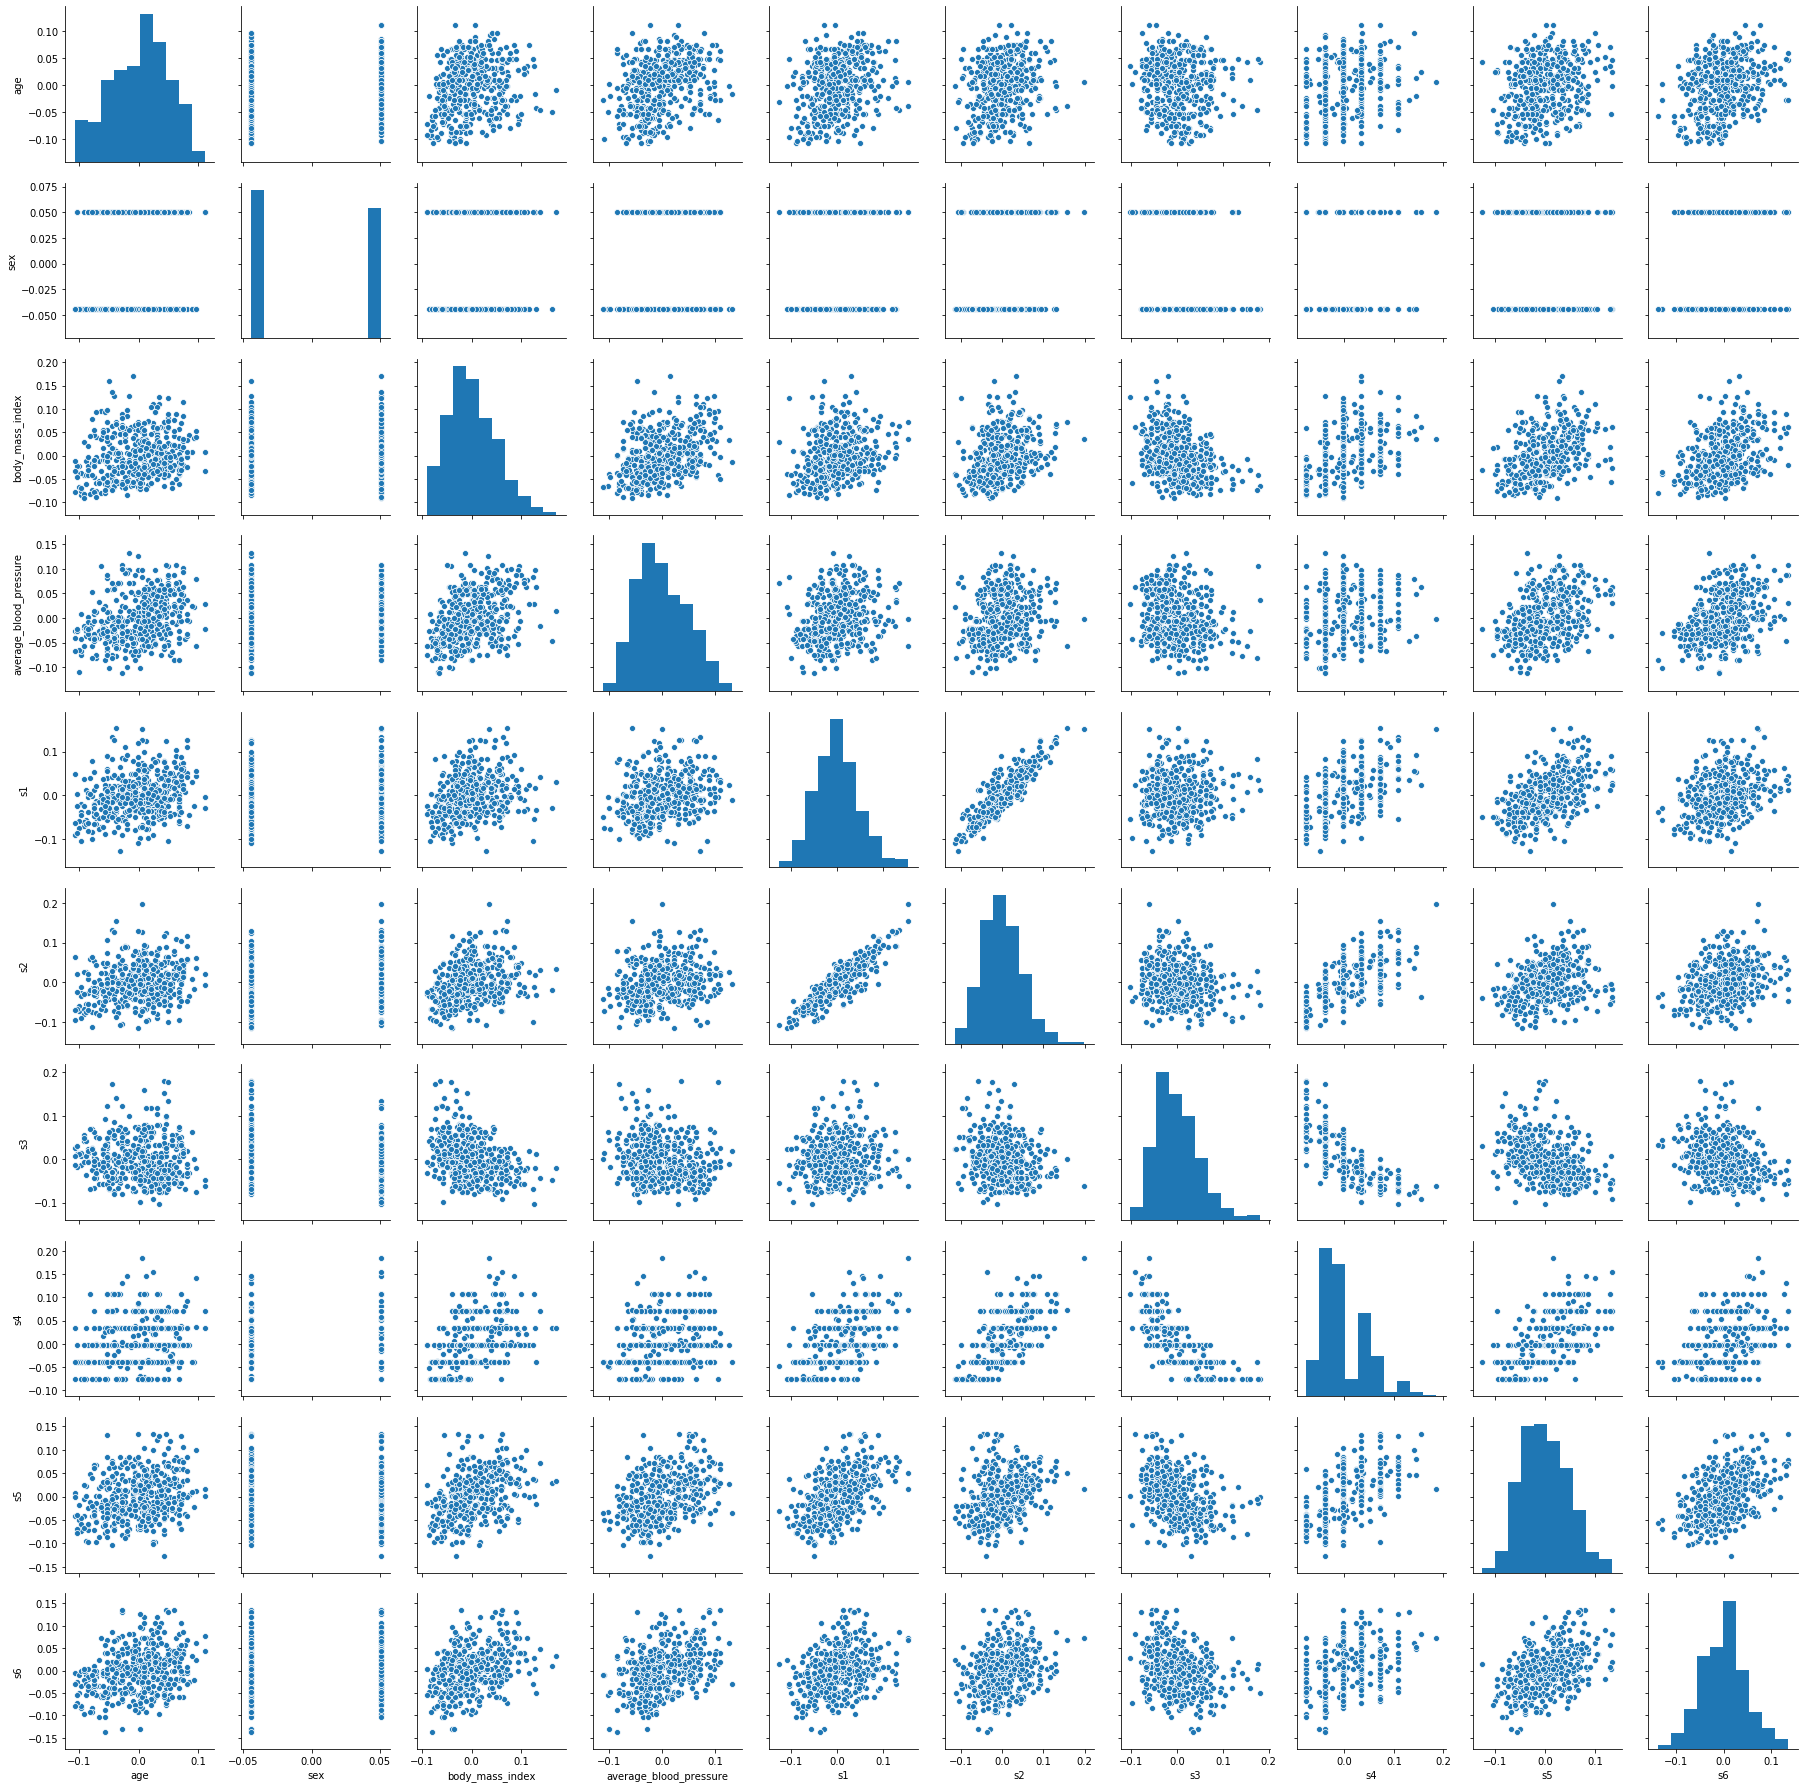

In [9]:
sns.pairplot(df_x)

# Solving Normally

Cross Validating. 
We will use `KFold` class to split the data.

In [10]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

In [11]:
def rmse(y_true, y_hat):
    return np.sqrt(mean_squared_error(y_true, y_hat))

def print_all_metrics(y_true, y_hat, type='train'):
    print('''
    ....{} metrics....
    rmse: {}
    mae: {},
    r2: {}
    '''.format(
        type,
        rmse(y_true, y_hat),
        mean_absolute_error(y_true, y_hat),
        r2_score(y_true, y_hat)
    ))
    
def show_actual_vs_predicted(y_true, y_hat):
    sns.scatterplot(y_true, y_hat)
    plt.show()
    
def show_residual_plot(y_true, y_hat):
    resid = y_true - y_hat
    sns.scatterplot(resid, y_true)
    plt.show()

In [12]:
random_state = 142
folds = KFold(5, shuffle=True, random_state=random_state)

In [120]:
def do_cv(folds, mdl):
    for (cvi, (train_index, test_index)) in enumerate(folds.split(X, y)):
        print('Cross Validation {}'.format(cvi + 1))
        mdl.fit(X[train_index], y[train_index])

        y_hat = mdl.predict(X[train_index])
        print_all_metrics(y[train_index], y_hat)

        y_hat = mdl.predict(X[test_index])
        print_all_metrics(y[test_index], mdl.predict(X[test_index]), type='test')


In [121]:
do_cv(folds, LinearRegression())

Cross Validation 1

    ....train metrics....
    rmse: 55.02436312772539
    mae: 44.74745118158389,
    r2: 0.5145594310441097
    

    ....test metrics....
    rmse: 47.45269989280756
    mae: 38.0110385192209,
    r2: 0.5129960721305509
    
Cross Validation 2

    ....train metrics....
    rmse: 53.221493080425205
    mae: 43.20290250040651,
    r2: 0.5133532947316353
    

    ....test metrics....
    rmse: 54.83009629950939
    mae: 43.96187104635424,
    r2: 0.5157971190066343
    
Cross Validation 3

    ....train metrics....
    rmse: 52.766894627525296
    mae: 42.57888151257503,
    r2: 0.5340127681563123
    

    ....test metrics....
    rmse: 56.73593621666708
    mae: 46.679995084432285,
    r2: 0.43008067559481755
    
Cross Validation 4

    ....train metrics....
    rmse: 52.77401832383665
    mae: 42.42384288310336,
    r2: 0.51855474235312
    

    ....test metrics....
    rmse: 56.91569994210364
    mae: 47.20352947312387,
    r2: 0.49517302931379437
    
Cross 

# Bagging:  Bootstrap Aggregrating

## Main Idea

Bagging could be done by simply **train several weak predictor and take the average of each predictors**.

Bagging comes from name: *Bootstrap Aggregating*. Bootstraping in statistics is an estimation of sampling distribution by taking random samples with replacement$^{5}$. Bagging predictor uses *bootstrap* because it literally train on different algorithm with same data${^6}$, thus it is sampling with replacement / bootstraping.


> A critical factor in whether bagging will improve accuracy is the stability of the procedure for constructing $\varphi$. If changes in $\mathcal{L}$  i.e. a replicate $\mathcal{L}$, produces small changes in $\varphi$, then $\varphi_B$ will be close to $\varphi$. Improvement will occur for unstable procedures where a small change in $\mathcal{L}$ can result in large changes in $\varphi$ $^6$

where:

- $\mathcal{L}$ is the learning sets / training set / training data
- $\varphi$ is the predictor
- $\varphi_B$ is the predictor trained on bootstrap sample of data



What does it means? It means that Bagging will excel if there is a small change in training set $\mathcal{L}$, results in big big change in prediction of $\varphi$.


## What Algorithms Could be Combined by Bagging?

> neural nets, classification and regression trees, and subset selection


## Toy Regressors

For this purpose we will use 3 toy regressors: `LinearRegression`, `Lasso`, and `Ridge` 

$$
f(x) =  \sum_{m=0}^{M} \frac{1}{M} * h_m(x)
$$

where:

- $m$ is the model index

- $h(x)$ is the prediction for model $h_m$ given the input $x$

- $f(x)$ is the final prediction

## Demo On Linear Method Unstability

Here I will demonstrate on how a little change in proportion in dataset will deviate result in linear model. This method has same effect on NeuralNets and DecissionTrees. 

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score

In [15]:
iris_dataset = load_iris()
X_iris, y_iris = iris_dataset['data'], iris_dataset['target']
X_iris = pd.DataFrame(X_iris)
X_train, X_test, y_train, y_test  = train_test_split(X_iris, y_iris, test_size=0.4, random_state=random_state)

In [16]:
def train_and_predict_logistic_regression(proportions):
    np.random.seed(random_state)

    X_train_sample = list()
    y_train_sample = list()
    _x = X_train.reset_index()

    for y in np.unique(y_iris):
        sample_index = np.random.choice(_x[y_train == y].index, proportions[y])
        for i in sample_index:
            X_train_sample.append(X_train.iloc[i])
            y_train_sample.append(y_train[i])

    mdl = LogisticRegression()
    mdl.fit(X_train_sample, y_train_sample)

    print('accuracy: {}\nprecision: {}\nf1: {}'.format(
        accuracy_score(y_test, mdl.predict(X_test)),
        precision_score(y_test, mdl.predict(X_test), average='macro'),
        f1_score(y_test, mdl.predict(X_test), average='macro')
    ))
    
    

In [17]:
proportions = [10, 15, 19]
train_and_predict_logistic_regression(proportions)

accuracy: 0.9
precision: 0.9116632160110422
f1: 0.9089026915113871


In [18]:
proportions = [10, 13, 19]
train_and_predict_logistic_regression(proportions)

accuracy: 0.8833333333333333
precision: 0.9102564102564102
f1: 0.8938845822566752


## Simple Bagging Implementation

In [142]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.base import BaseEstimator, RegressorMixin
from copy import deepcopy

In [147]:
class SimpleBaggingModel(BaseEstimator, RegressorMixin):
    def __init__(self, base_estimator, n_iter, *args, **kwargs):
        super().__init__(*args, **kwargs)
        
        self.models = [deepcopy(base_estimator) for i in range(n_iter)]
        self.len_models = np.float(len(self.models))
        
        self.model_weights = np.array([1/self.len_models for i in range(np.int(self.len_models))])
    
    def _get_random_choice(self, X, y):
        indexes = np.arange(len(X))
        bootstrap_sample = np.random.choice(indexes, len(X))
        return np.array([X[i] for i in bootstrap_sample]), np.array([y[i] for i in bootstrap_sample])
        
    def fit(self, X, y):
        for model in self.models:
            model.fit(*self._get_random_choice(X, y))
        return self
    
    def predict(self, X):
        predictions = []
        for model in self.models:
            predictions.append(model.predict(X))
        
        predictions = np.column_stack(predictions)
        return np.sum(
            (predictions * self.model_weights).T,
            axis=0
        )
        

In [149]:
do_cv(folds, SimpleBaggingModel(LinearRegression(), 10))


Cross Validation 1

    ....train metrics....
    rmse: 55.13810465036865
    mae: 44.8311591276148,
    r2: 0.5125504367055902
    

    ....test metrics....
    rmse: 47.18119051778752
    mae: 37.562764262853975,
    r2: 0.5185530943562255
    
Cross Validation 2

    ....train metrics....
    rmse: 53.29030799180428
    mae: 43.29458609843629,
    r2: 0.5120940215262753
    

    ....test metrics....
    rmse: 54.829700737551605
    mae: 44.26763447175827,
    r2: 0.5158041053722113
    
Cross Validation 3

    ....train metrics....
    rmse: 52.889377616718875
    mae: 42.544781573685704,
    r2: 0.531846949925868
    

    ....test metrics....
    rmse: 56.67850709326859
    mae: 46.78686224314351,
    r2: 0.4312338566106785
    
Cross Validation 4

    ....train metrics....
    rmse: 52.85176290320033
    mae: 42.398264938066035,
    r2: 0.5171352056096121
    

    ....test metrics....
    rmse: 56.9169086845541
    mae: 47.08809675279553,
    r2: 0.49515158664437897
    
Cross

## Bagging Using Sklearn

Sklearn has a nice wrapper for simple bagging, both classifier and regressor. It resides at `sklearn.ensemble` module, `BaggingClassifier`, `BaggingRegressor`, `VotingClassifier` and `VotingRegressor`. 

In [111]:
from sklearn.ensemble import VotingRegressor, BaggingRegressor

In [134]:
do_cv(folds, BaggingRegressor(base_estimator=LinearRegression()))


Cross Validation 1

    ....train metrics....
    rmse: 55.09969883764457
    mae: 44.745080551716086,
    r2: 0.5132292549872977
    

    ....test metrics....
    rmse: 47.58397508755066
    mae: 38.26932479257507,
    r2: 0.5102978076653342
    
Cross Validation 2

    ....train metrics....
    rmse: 53.328949569009154
    mae: 43.312391848471314,
    r2: 0.5113861895506542
    

    ....test metrics....
    rmse: 54.992983075600854
    mae: 44.03197556776964,
    r2: 0.5129159495878475
    
Cross Validation 3

    ....train metrics....
    rmse: 52.884393362642584
    mae: 42.612882750677166,
    r2: 0.5319351825315326
    

    ....test metrics....
    rmse: 57.374383153983906
    mae: 47.15016072904597,
    r2: 0.4171819542566956
    
Cross Validation 4

    ....train metrics....
    rmse: 52.88001103085017
    mae: 42.505015017424434,
    r2: 0.5166189060294248
    

    ....test metrics....
    rmse: 57.26542372051097
    mae: 47.37791559140956,
    r2: 0.488950057104269
    
C

In [135]:
do_cv(folds, VotingRegressor([
        ('lr', LinearRegression()),
        ('la', Lasso()),
        ('ri', Ridge())
    ]))


Cross Validation 1

    ....train metrics....
    rmse: 57.80844324838222
    mae: 48.73861299575631,
    r2: 0.4641927726453505
    

    ....test metrics....
    rmse: 48.217675647771706
    mae: 38.881482535360384,
    r2: 0.49716771797273895
    
Cross Validation 2

    ....train metrics....
    rmse: 55.86460921921472
    mae: 46.59052675159114,
    r2: 0.46381679109484175
    

    ....test metrics....
    rmse: 58.47910968473439
    mae: 49.41577286710758,
    r2: 0.4492039006058257
    
Cross Validation 3

    ....train metrics....
    rmse: 55.37289231457794
    mae: 45.83066583291244,
    r2: 0.4868487845360434
    

    ....test metrics....
    rmse: 59.13910729957115
    mae: 50.065281283485426,
    r2: 0.3807778816119701
    
Cross Validation 4

    ....train metrics....
    rmse: 55.666422272270886
    mae: 46.29981399897339,
    r2: 0.46433508042988714
    

    ....test metrics....
    rmse: 59.03975704782762
    mae: 48.93645295855194,
    r2: 0.45679030757347705
    


# Boosting
There are 2 types of popular boosting: AdaBoost and Gradient Boosting, where each boosting is based on decision tree.

## Adaptive Boosting (AdaBoost)

### Main Idea
Main idea for Adaptive Boosting is 
> iteratively train $T$ models, for each model $t \in T$: train the model with **weigthed samples**, where samples with **less error will receive less weight** in next iteration. Then combine the prediction of each model $t$ with **weighted estimators**.

### Deeper Understanding: the Algorithm
Algorithm for AdaBoost is given by $^{1, 2}$, and simple implementation could be also be found online $^{3}$. 

Given $(x_1, y_1) ... (x_m, y_m)$ where $x_i \in \mathcal{X}$, $y_i \in \{-1, +1\}$

Initialize: $D_1(i) = 1/m$ for $i = 1, ..., m.$

For $t = 1...T$

- Train weak learner using distribution $D_t$
- Get weak hypothesis $h_t: \mathcal{X} -> \{-1, +1\}$
- Choose $\alpha = \frac{1}{2} \text{ ln } \frac{(1 - \epsilon_t)}{\epsilon_t}$
- Update, for $i \text{ = 1, ... , m}$:

$$
D_{t+1}(i) = \frac{D_t(i)\text{ exp }(-\alpha_t y_i h_t (x_i))} {Z_t}
$$

Where $Z_t$ is normalization factor. Final output:

$$
H(x) = \text{sign}(\sum_{t=1}^{T} \alpha_t h_t(x))
$$

However this algorithm is for training a classifier, for regressor refer to [4]


In [122]:
from sklearn.ensemble import AdaBoostRegressor

In [123]:
mdl = AdaBoostRegressor(base_estimator=LinearRegression(), n_estimators=10)
mdl.fit(X[train_index], y[train_index])

AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True,
                                                  fit_intercept=True,
                                                  n_jobs=None,
                                                  normalize=False),
                  learning_rate=1.0, loss='linear', n_estimators=10,
                  random_state=None)

In [124]:
do_cv(folds, mdl)

Cross Validation 1

    ....train metrics....
    rmse: 55.58461352363204
    mae: 45.70915671410108,
    r2: 0.5046237288597635
    

    ....test metrics....
    rmse: 46.32977941873833
    mae: 36.78358234262941,
    r2: 0.5357722748522942
    
Cross Validation 2

    ....train metrics....
    rmse: 53.28447986824357
    mae: 43.62177432705803,
    r2: 0.5122007358967141
    

    ....test metrics....
    rmse: 55.210424637037285
    mae: 44.715309105399385,
    r2: 0.509056486124728
    
Cross Validation 3

    ....train metrics....
    rmse: 53.24303854517125
    mae: 43.148646918167266,
    r2: 0.5255651213851553
    

    ....test metrics....
    rmse: 57.719051722991
    mae: 47.67595685821596,
    r2: 0.4101585257803285
    
Cross Validation 4

    ....train metrics....
    rmse: 52.92267274869893
    mae: 42.845432589246705,
    r2: 0.5158386419584421
    

    ....test metrics....
    rmse: 57.47681308397919
    mae: 47.92605989400731,
    r2: 0.48517011776834285
    
Cross 

## Gradient Boosting (GBM)

Gradient boosting works slightly different from Adaptive Boosting. Main differences between those two algorithm are: **how to fit each iteration model** and **how to determine estimator weights for each iteration**. Idea comes from Friedman$^{9}$, and now have been improved into *extreme* gradient boosting, for example: LightGBM$^{7}$, XGBoost$^{8}$, and CatBoost$^{10}$

### Main Idea

Gradient boosting main idea is to train next iteration model on residual of previous model as the target. 

In [125]:
from sklearn.ensemble import GradientBoostingRegressor

In [126]:
mdl = GradientBoostingRegressor(n_estimators=10)
mdl.fit(X[train_index], y[train_index])

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=10,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [127]:
do_cv(folds, mdl)

Cross Validation 1

    ....train metrics....
    rmse: 55.47491107519263
    mae: 47.931418569695666,
    r2: 0.5065771601937898
    

    ....test metrics....
    rmse: 52.56444394990826
    mae: 43.73903490279989,
    r2: 0.40242178236903403
    
Cross Validation 2

    ....train metrics....
    rmse: 53.35330434322521
    mae: 45.85119284616699,
    r2: 0.5109397979959944
    

    ....test metrics....
    rmse: 63.39114366471927
    mae: 53.26895554133836,
    r2: 0.3527880519487061
    
Cross Validation 3

    ....train metrics....
    rmse: 53.289577662852885
    mae: 45.35429693697925,
    r2: 0.5247353629381997
    

    ....test metrics....
    rmse: 62.3771317980767
    mae: 53.06529940099563,
    r2: 0.3111134045227266
    
Cross Validation 4

    ....train metrics....
    rmse: 53.39010855604922
    mae: 45.41101696828909,
    r2: 0.5072482289524957
    

    ....test metrics....
    rmse: 62.81946994086882
    mae: 53.1134645599001,
    r2: 0.38501160269023027
    
Cross 

# Stacking

Stacking is another *Meta - Feature* learning algorithm that "stack" models together. 

## Main Idea
Stacking works by constructing network of models. We learn to *weight* each prediction result to construct final, more accurate prediction.

![stacking](https://cdn-images-1.medium.com/max/1600/0*GHYCJIjkkrP5ZgPh.png)


In [128]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

In [129]:
class StackModel(object):
    def __init__(self, models):
        self.models = models
        self.meta_learner = LinearRegression()
        
    def fit(self, X, y):
        predictions = list()
        for m in models:
            m.fit(X, y)
            predictions.append(m.predict(X))

        predictions = np.column_stack(predictions)

        self.meta_learner.fit(predictions, y)
    
        return self
    
    def predict(self, X):
        predictions = list()
        for m in models:
            predictions.append(m.predict(X))

        final_prediction = meta_learner.predict(np.column_stack(predictions))
        return final_prediction
    

In [130]:
models = [
    make_pipeline(MinMaxScaler(), AdaBoostRegressor()),
    make_pipeline(MinMaxScaler(),GradientBoostingRegressor()),
    make_pipeline(MinMaxScaler(), Ridge()),
    make_pipeline(MinMaxScaler(), SVR())
]

In [131]:
mdl = StackModel(models)
mdl.fit(X[train_index], y[train_index])

In [132]:
do_cv(folds, mdl)

Cross Validation 1

    ....train metrics....
    rmse: 27.526870386874396
    mae: 20.95588714658343,
    r2: 0.8785102341960441
    

    ....test metrics....
    rmse: 62.90063010602655
    mae: 49.449384572691606,
    r2: 0.14430183360388305
    
Cross Validation 2

    ....train metrics....
    rmse: 25.420983563466706
    mae: 19.170406795039924,
    r2: 0.88897408044089
    

    ....test metrics....
    rmse: 58.37330465132906
    mae: 46.33887812408529,
    r2: 0.4511951853681898
    
Cross Validation 3

    ....train metrics....
    rmse: 26.087357228349216
    mae: 20.07656384004358,
    r2: 0.8861033068968689
    

    ....test metrics....
    rmse: 68.81116456051153
    mae: 52.91720167545122,
    r2: 0.1616705027175802
    
Cross Validation 4

    ....train metrics....
    rmse: 26.71528532801037
    mae: 19.571672707095523,
    r2: 0.8766252686460366
    

    ....test metrics....
    rmse: 66.74097407750051
    mae: 56.96343240600481,
    r2: 0.30583379142640654
    
Cr

# Bonus

## Implementing AdaBoost

In [26]:
class SimpleAdaBoostLR(BaseEstimator, RegressorMixin):
    def __init__(self, M=10, lr=1, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.M = M # n iterations
        self.lr = lr # learning rate
        
        self.estimators = list()
        self.estimator_weights = np.zeros(self.M)
        
        # for debuging purpose
        self.sample_weights = list()
        
    def fit(self, X, y):
        N = len(y)
        
        sample_weight = np.ones(N) / N
        self.sample_weights.append(sample_weight.copy())
        
        for m in tqdm(range(self.M)):
            
            # train weak learner
            estimator = LinearRegression()
            estimator.fit(X, y, sample_weight=sample_weight)
            self.estimators.append(estimator)
            
            # predict with weak learner
            y_hat = estimator.predict(X)
            
            # calculate loss by Drucker
            # using linear loss for simplicity
            errors = np.abs(y_hat - y)
            L = errors / np.max(errors)
            
            avg_L = (L * sample_weight).sum()
            assert avg_L <= 1 and avg_L >= 0
        
            if avg_L <= 0.1:
                break
            
            # update/boost sample weights
            beta = avg_L / (1 - avg_L)
            self.estimator_weights[m] = self.lr * np.log(1. / beta)
            
            sample_weight = sample_weight * (np.power(beta, (1. - L)) * self.lr)
            self.sample_weights.append(sample_weight.copy())
            
    
    def predict(self, X):
        # sum of alpha * hypothesis
        l_estimators = len(self.estimators)
        estimates = np.array([self.estimators[m].predict(X) for m in range(l_estimators)])
        
        return np.sum(
            self.estimator_weights[:l_estimators, np.newaxis] * estimates
            , axis=0
        )
        pass
            

In [27]:
mdl = SimpleAdaBoostLR()
mdl.fit(X[train_index], y[train_index])

  0%|          | 0/10 [00:00<?, ?it/s]


In [30]:
print_all_metrics(y[train_index], mdl.predict(X[train_index]))


    ....train metrics....
    rmse: 263.9322313315706
    mae: 243.98636110368443,
    r2: -10.989243459600578
    


In [25]:
from tqdm import tqdm

# References

[1] Schapire, Robert E. [*Explaining AdaBoost*](http://rob.schapire.net/papers/explaining-adaboost.pdf). Princeton University

[2] Freund, Yoav & Schapire, Robert E. [*A Short Introduction to Boosting*](https://cseweb.ucsd.edu/~yfreund/papers/IntroToBoosting.pdf). AT&T Labs

[3] Sicotte, Xavier Bourret. [*Adaboost: Implementation and Intuition*](https://xavierbourretsicotte.github.io/AdaBoost.html)

[4] Drucker, Harris. [*Improving Regressors using Boosting Techniques*](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.31.314&rep=rep1&type=pdf)

[5] Wikipedia. [Bootstraping (Statistics)](https://en.wikipedia.org/wiki/Bootstrapping_(statistics))

[6] Breiman, Leo. [*Bagging Predictors*](https://www.stat.berkeley.edu/~breiman/bagging.pdf). 1994. Technical Report No.421

[7] Ke, Guolin et al. [*LightGBM: A Highly Efficient Gradient Boosting Decision Tree*](https://papers.nips.cc/paper/6907-lightgbm-a-highly-efficient-gradient-boosting-decision-tree.pdf). 2017. NIPS

[8] Chen, Tianqi & Guestrin, Carlos. [*XGBoost: A Scalable Tree Boosting System*](https://www.kdd.org/kdd2016/papers/files/rfp0697-chenAemb.pdf). 2016. KDD

[9] Friedman, Jerome H. [*Greedy Function Approximation: A Gradient Boosting Machine*](https://statweb.stanford.edu/~jhf/ftp/trebst.pdf). 1999. IMS 1999 Reitz Lecture.

[10] Prokhorenkova, Liudmila et al. [*CatBoost: unbiased boosting with categorical features*](https://arxiv.org/pdf/1706.09516.pdf). 2019. ArXiv.

[11] Wolpert, David H. [*Stacked Generalization*](https://www.sciencedirect.com/science/article/pii/S0893608005800231). 1992. Neural Networks